# OMSI 2021-22 - TP/TD Intégration numérique
# Programmation de sommes de Riemann avec Python

## Introduction

Ce TP s'inscrit dans le cadre de l'utilisation des outils numérique en OMSI et sert d'introduction
au chapitre 6 du cours. Il consiste à approximer le calcul d'intégrales simples par la méthode de
Riemann avec comme objectif pédagogique d'aider à mieux comprendre les notions de bornes
d'intégration et de balayage d'un domaine. Ces bases seront utiles ensuite pour la résolution
des intégrales multiples. Un autre aspect est d'aborder la problématique de la convergence des
calculs numériques.

Ce TP de 2 heures est à effectuer sur PC en utilisant le langage Python. Les scripts (ou programmes) sont très simples et ne font pas appel à un environnement graphique. Des connaissances de base en Python suffisent : définition de variables, affichage d'un résultat, boucles.

## Intégrale simple en coordonnées cartésiennes : masse d’une barre inhomogène (premier exemple guidé)
Une tige métallique de longueur `l` a une section non uniforme, elle est plus épaisse d'un côté que
de l'autre. La masse linéique `λ` varie en fonction de la distance `x`, par rapport à une extrémité
de la tige, selon la loi `λ = λ0 + kx²`, où `λ0` et `k` sont des constantes positives.

1. Déterminer analytiquement la masse `m` de cette tige. Indication : `dm = λdx`
1. Application numérique : calculer `m` pour `l` = 1,2 m, `λ0 = 0,625 kg * m⁻¹`, `k = 5,0 *10⁻² kg * m⁻³`.
1. Utiliser le script 1 qui donne une approximation de la valeur de m. Diminuer petit à petit
le pas d'intégration dx : commencer par 1e − 1, par exemple, puis 5e − 2, 1e − 2, 1e − 3...
jusqu'à 1e − 6. Dans un logiciel tableur, créer une colonne dx, une colonne m approchée,
une colonne m exacte et une colonne dans laquelle vous calculerez l'écart relatif en pourcent
entre la valeur approchée et la valeur exacte. Tracer l'évolution de m en fonction du pas
d'intégration (utiliser une échelle logarithmique pour l'axe des abscisses). Conclusion ?
1. Modifier le script pour utiliser une boucle for

### Déterminer analytiquement la masse `m` de cette tige. Indication : `dm = λdx`

>$m = l*λ_0 + \frac{k l^3}{3}$

### Application numérique : calculer `m` pour `l=1,2 m`, `λ0=0,625 kg*m⁻¹`, `k=5,0*10⁻2kg*m⁻³`.

In [1]:
# votre code ici, insérez des cellules au besoin

In [2]:
l = 1.2
lambda0 = 0.625
k = 5*10**-2
m = lambda0 * l + (k*l**3)/3
m

0.7788

### Utiliser le script ci-dessous qui donne une approximation de la valeur de m. 


- Diminuer petit à petit le pas d'intégration dx : commencer par 1e − 1, par exemple, puis 5e−2, 1e−2, 1e−3…
jusqu'à 1e-6. 
- Créez une liste de valeurs pour dx, une liste des valeurs de m approchées correspondantes, une liste de valeurs exactes de m aussi longue, et une liste des écarts entre les valeurs approchées et les valeurs exactes. Créez une DataFrame pandas avec ces 4 listes en colonnes. 
- Tracer l'évolution de m en fonction du pas d'intégration (utiliser une échelle logarithmique pour l'axe des abscisses). 
- Conclusion 


In [3]:
#Script 1
longueur = 1.2  # longueur
lambda_0 = 0.625
k = 5.0e-2

m = 0.0  # initialisation du résultat de l’intégrale
dx = 1e-1  # pas d’intégration sur x
x = 0.0  # initialisation de la variable x à la première borne

while x < longueur:  # tant que x < l on répète les instructions suivantes
    m = m + (lambda_0 + k * x**2) * dx  # mise à jour de m
    x = x + dx  # mise à jour de x, on l’augmente de la valeur du pas

print(" Résultat par la méthode de Riemann : {0:f} ".format(m))
print(" Résultat exact : {0:f} ".format(lambda_0 * l + (k * l**3) / 3))

 Résultat par la méthode de Riemann : 0.775300 
 Résultat exact : 0.778800 


In [4]:
#Script 1
def riemann(dx):
    longueur = 1.2  # longueur
    lambda_0 = 0.625
    k = 5.0e-2

    m = 0.0  # initialisation du résultat de l’intégrale
    
    x = 0.0  # initialisation de la variable x à la première borne

    while x < longueur:  # tant que x < l on répète les instructions suivantes
        m = m + (lambda_0 + k * x**2) * dx  # mise à jour de m
        x = x + dx  # mise à jour de x, on l’augmente de la valeur du pas

    return m

In [5]:
# refactorisation du script en fonction, pour faire varier dx et obtenir m_approx facilement
def riemann_int(dx):
    longueur = 1.2  # longueur
    lambda_0 = 0.625
    k = 5.0e-2
    m = 0.0  # initialisation du résultat de l’intégrale
    x = 0.0  # initialisation de la variable x à la première borne

    while x < longueur:  # tant que x < l on répète les instructions suivantes
        m += (lambda_0 + k * x**2) * dx  # mise à jour de m
        x += dx  # mise à jour de x, on l’augmente de la valeur du pas

    return m


In [6]:
riemann_int(dx=0.1)

0.7753

In [7]:
dxs = [1/10**n for n in range(1, 7)] + [5/10**n for n in range(2, 6)] # Valeurs de dx par 2 list comprehensions
dxs.sort(reverse=True) # classement des valeurs de dx , de 10⁻¹ à 10⁻⁶
dxs

[0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05, 1e-06]

In [8]:
m_approx = [riemann_int(dx) for dx in dxs] # list comprehension avec notre fonction

In [9]:
m_exacts = [lambda_0 * l + (k * l**3) / 3] * len(dxs)

In [10]:
ecarts = ["{:.2%}".format((approx - exact)/exact) for approx, exact in zip(m_approx, m_exacts)] 
# list comprehension sur le zip des deux autres listes

In [11]:
import pandas as pd # pour faire un tableau dans le notebook plutôt que dans Excel

In [12]:
df = pd.DataFrame() # création du DataFrame qui remplacerait le tableau excel
df['dx'] = dxs
df['m_approchée'] = m_approx
df['m_exacte'] = m_exacts
df['écart relatif'] = ecarts
df['dx'] = df['dx'].apply(lambda x: "{:.1e}".format(x))
df

,dx,m_approchée,m_exacte,écart relatif
0,1.0e-01,0.775300,0.7788,-0.45%
1,5.0e-02,0.777025,0.7788,-0.23%
2,1.0e-02,0.778441,0.7788,-0.05%
3,5.0e-03,0.782105,0.7788,0.42%
4,1.0e-03,0.779461,0.7788,0.08%
5,5.0e-04,0.779131,0.7788,0.04%
6,1.0e-04,0.778866,0.7788,0.01%
7,5.0e-05,0.778798,0.7788,-0.00%
8,1.0e-05,0.778807,0.7788,0.00%
9,1.0e-06,0.778801,0.7788,0.00%


In [13]:
import numpy as np
import matplotlib.pyplot as plt

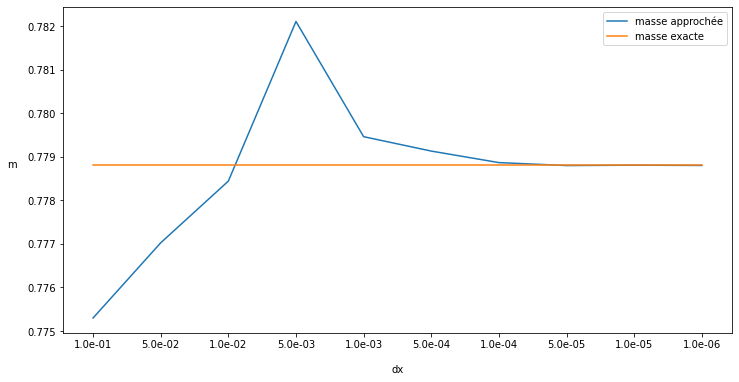

In [14]:
figure, axes = plt.subplots(figsize=(12,6)) 

plt.plot(df.dx, df.m_approchée, label='masse approchée')
plt.plot(df.m_exacte, label='masse exacte')
plt.xlabel('dx', labelpad=15)
plt.ylabel('m', rotation=0,labelpad=15)
plt.legend()
plt.show()

Conclusion : la somme de Riemann converge bien vers la valeur exacte, à condition que les pas soient assez petits.

### Modifier le script pour qu'il utilise une boucle for

In [15]:
#Script 2
longueur = 1.2  # longueur
lambda_0 = 0.625
k = 5.0e-2

m = 0.0  # initialisation du résultat de l’intégrale
dx = 1e-1  # pas d’intégration sur x
x = 0.0  # initialisation de la variable x à la première borne

num_steps = int(longueur / dx) +1

for _ in range(num_steps):
    m = m + (lambda_0 + k * x**2) * dx  # mise à jour de m
    x = x + dx  # mise à jour de x, on l’augmente de la valeur du pas

print(" Résultat par la méthode de Riemann : {0:f} ".format(m))
print(" Résultat exact : {0:f} ".format(lambda_0 * l + (k * l**3) / 3))

 Résultat par la méthode de Riemann : 0.775300 
 Résultat exact : 0.778800 


## Intégrales doubles se ramenant à des intégrales simple en coordonnées cartésiennes et polaires (deuxième exemple guidé)

On propose de calculer l'aire A du domaine D déni par :
D = {(x, y) ∈ R2 ∣ ∣ x2 + y2 ≤ 4, x ≥ 0, y ≥ 0 }

1. Représenter ce domaine. Quel est le résultat attendu ?
1. En choisissant judicieusement la surface élémentaire, montrer que l'intégrale permettant de
calculer cette aire devient une intégrale simple et la résoudre analytiquement (un changement
de variable sera nécessaire).
1. Utiliser le script 2 et diminuer petit à petit le pas d'intégration dx. Conclusion ?
1. Modifier le script pour utiliser une boucle for
1. Réécrire l'intégrale en utilisant les coordonnées polaires. Montrer qu'en choisissant judicieusement la surface élémentaire, on peut ramener l'intégrale à une intégrale simple et la résoudre.
1. Écrire un autre script, en vous inspirant du premier, pour calculer cette intégrale.

On propose de calculer l'aire A du domaine D défini par : 
    
    
$\def\R{{\mathbb R}}$
$D =\Bigl\{ (x,y) \in \R^2~\big\vert\ x^{2}+y^{2} \leq 4, x \geq 0, y \geq 0 \Bigr\}$


### Représenter ce domaine. Quel est le résultat attendu ?

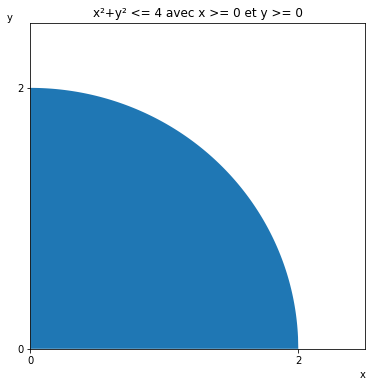

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

figure, ax = plt.subplots(figsize=(6,6)) 
x = np.linspace(0, 2, 1000)
y = np.sqrt(4-x**2)

ax.fill_between(x,y) # remplit l'aire entre l'axe des abscisses et la courbe

# paramétrage du plot
## taille des bornes
plt.xlim(0,2.5)
plt.ylim(0, 2.5)
## labels des axes
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top', rotation=0)
## réduction du nombre de ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)
## titre
plt.title( 'x²+y² <= 4 avec x >= 0 et y >= 0')
## lets's go
plt.show()

Il s'agit d'un quart de cercle de rayon 2 situé dans le premier quadrant. $A = \pi$

### En choisissant judicieusement la surface élémentaire, montrer que l'intégrale permettant de calculer cette aire devient une intégrale simple et la résoudre analytiquement (un changement de variable sera nécessaire).

En cartésien, $\mathrm{d}A = \mathrm{d}x \mathrm{d}y$ mais on peut prendre une surface élémentaire plus grande  : $\mathrm{d}A = y \mathrm{d}x = \sqrt{4 - x^{2}} \mathrm{d}x$ (ce qui revient pour une intégrale double à calculer la première intégrale sur $y$ entre $0$ et $\sqrt{4 - x^{2}}$).

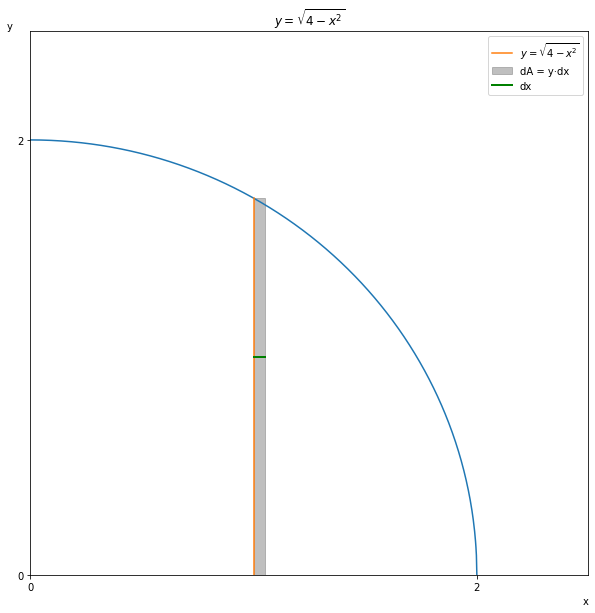

In [17]:
figure, ax = plt.subplots(figsize=(10, 10))

# plot de l'arc de cercle
x = np.linspace(0, 2, 1000)
y = np.sqrt(4 - x**2)
plt.plot(x, y)

# plot y1
y1 = np.sqrt(4 - 1**2)
plt.plot((1, 1), (0, y1), label='$y= \sqrt{4 - x^{2}} $')


# Rectangle dx * y
xy = (1, 0)
dx = 0.05
rect = patches.Rectangle(xy,
                         width=dx,
                         height=y1,
                         linewidth=1,
                         edgecolor='gray',
                         facecolor='gray',
                         alpha=.5,
                         label='dA = y·dx')
ax.add_patch(rect)

# plot dx
plt.plot((1, 1+dx),(1,1), label="dx", linewidth=2, color='green')

# paramétrage du plot
## taille des bornes
plt.xlim(0,2.5)
plt.ylim(0, 2.5)
## labels des axes
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top', rotation=0)
## réduction du nombre de ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)
## titre
plt.title('$y= \sqrt{4 - x^{2}} $')
# légende
plt.legend()
## lets's go
plt.show()

\begin{equation}
A = \displaystyle\int_{0}^{2}{\sqrt{4 - x^{2}} \mathrm{d}x} = \displaystyle\int_{0}^{2}{2 \sqrt{1 - \left( \frac{x}{2} \right)^{2}} \mathrm{d}x}
\end{equation}

On pose par exemple $\displaystyle\frac{x}{2} = \sin \alpha \Rightarrow \mathrm{d}x = 2 \cos \alpha \mathrm{d}\alpha$

Et pour calculer les nouvelles bornes on utilise : $\alpha = \arcsin{\displaystyle\frac{x}{2}}$

\begin{equation}
\begin{split}
A & = \displaystyle 4 \int_{0}^{\frac{\pi}{2}}{\sqrt{1 - \sin^{2} \alpha} \cos \alpha \mathrm{d}\alpha} = \displaystyle 4 \int_{0}^{\frac{\pi}{2}}{ \cos^{2} \alpha \mathrm{d}\alpha} = \displaystyle 2 \int_{0}^{\frac{\pi}{2}}{ \left( 1 + \cos 2\alpha \right) \mathrm{d}\alpha}\\
& = 2 \bigg[ \alpha + \frac{1}{2} \sin 2\alpha \bigg]_{0}^{\frac{\pi}{2}} = 2 \left( \frac{\pi}{2} - 0\right) = \pi
\end{split}
\end{equation}

### Utiliser le script ci-dessous et diminuer petit à petit le pas d'intégration dx. Conclusion ?

In [18]:
# Aire d'un quart de disque de rayon 2 : intégrale simple en cartésien
from math import pi, sqrt

A = 0.0 # initialisation du résultat de l'intégrale
dx = 1e-1 # pas d'intégration sur x
x = 0.0 # initialisation de la variable x à la première borne

while x < 2: # tant que x est inférieur à 2, on répète le bloc indenté ci-dessous
    A = A + sqrt(4-x**2)*dx # mise à jour de A
    x = x + dx # mise à jour de x, on l'augmente de la valeur du pas
    
print('Résultat par la méthode de Riemann : {0:f}'.format(A))
print('Résultat par un calcul analytique (pi) : {0:f}'.format(pi))

Résultat par la méthode de Riemann : 3.228465
Résultat par un calcul analytique (pi) : 3.141593


In [19]:
# refactorisation du script en fonction de dx
def riemann_quarter_circle(dx):
    A = 0.0 # initialisation du résultat de l'intégrale
    x = 0.0 # initialisation de la variable x à la première borne

    while x < 2: # tant que x est inférieur à 2, on répète le bloc indenté ci-dessous
        A = A + sqrt(4-x**2)*dx # mise à jour de A
        x = x + dx # mise à jour de x, on l'augmente de la valeur du pas

    return A

riemann_quarter_circle(dx=0.1) # test de la fonction

dxs = [10**-i for i in range(1,7)] # liste de valeurs de dx, entre 10⁻1 et 10⁻6

df = pd.DataFrame() # création d'une DataFrame pandas pour stocker et montrer les résultats
df['dx'] = dxs # colonne dx

df['A_approchée'] = [riemann_quarter_circle(dx) for dx in dxs] # Colonne des valeurs approchées, via notre fonction
df['A_réelle']= [np.pi] * len(dxs) # colonne avec la valeur réelle
df['Écarts relatifs'] = (df['A_approchée'] - df['A_réelle']) / df['A_réelle'] # colonne des écarts
df['dx'] = df['dx'].apply(lambda x: "{:.0e}".format(x)) # formatage en notation scientifique de la colonne dx
df['Écarts relatifs'] = df['Écarts relatifs'].apply(lambda x: "{:.2e}".format(x)) # idem pour colonne écarts
df

,dx,A_approchée,A_réelle,Écarts relatifs
0,1e-01,3.228465,3.141593,2.77e-02
1,1e-02,3.151177,3.141593,3.05e-03
2,1e-03,3.142580,3.141593,3.14e-04
3,1e-04,3.141692,3.141593,3.17e-05
4,1e-05,3.141603,3.141593,3.18e-06
5,1e-06,3.141594,3.141593,3.18e-07


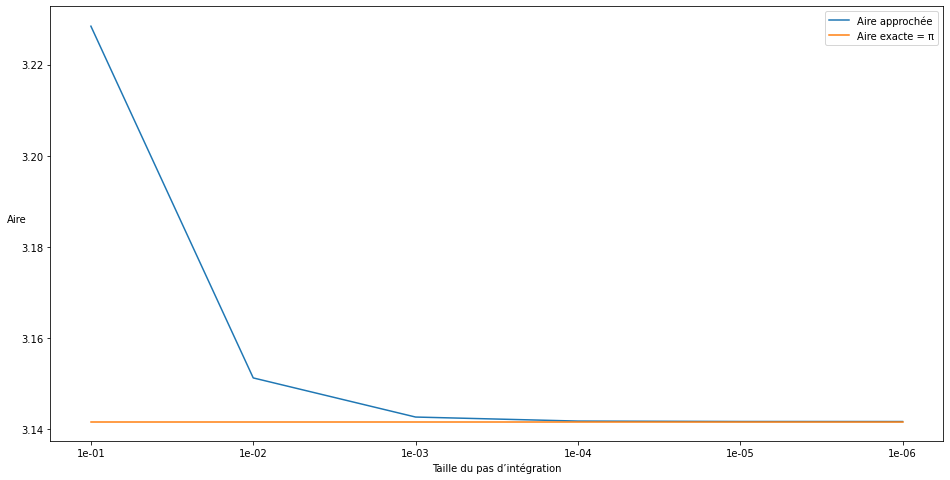

In [20]:
figure, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.dx, df.A_approchée, label='Aire approchée')
ax.plot(df.dx, [np.pi]*len(df.dx), label='Aire exacte = π')
ax.xscale='log'


#plt.title('$y= \sqrt{4 - x^{2}} $')
plt.xlabel('Taille du pas d’intégration')
plt.ylabel('Aire', rotation=0)

plt.legend()
plt.show()



> Conclusion : La méthode de Riemann converge bien vers la vraie valeur, à mesure que la taille du pas diminue.

### Modifier le script pour utiliser une boucle for

In [21]:
# Aire d'un quart de disque de rayon 2 : intégrale simple en cartésien
from math import pi, sqrt

A = 0.0 # initialisation du résultat de l'intégrale
dx = 1e-1 # pas d'intégration sur x
x = 0.0 # initialisation de la variable x à la première borne

for indice in range(0, round(2/dx)): # boucle de 0 à indice max-1 par pas de 1
    A = A + sqrt(4-x**2)*dx # mise à jour de A
    x = x + dx # mise à jour de x, on l'augmente de la valeur du pas
    
print('Résultat par la méthode de Riemann : {0:f}'.format(A))
print('Résultat par un calcul analytique (pi) : {0:f}'.format(pi))

Résultat par la méthode de Riemann : 3.228465
Résultat par un calcul analytique (pi) : 3.141593


### Réécrire l'intégrale en utilisant les coordonnées polaires. Montrer qu'en choisissant judicieusement la surface élémentaire, on peut ramener l'intégrale à une intégrale simple et la résoudre.

En polaire on a $\mathrm{d}A = r\mathrm{d}r\mathrm{d}\theta$. On peut considérer un $\mathrm{d}A$ plus grand représenté ci-dessous 

$\mathrm{d}A = \displaystyle\frac{\pi}{2}r\mathrm{d}r$

\begin{equation}
A = \displaystyle\frac{\pi}{2}\displaystyle\int_{0}^{2}{r\mathrm{d}r} = \frac{\pi}{4} \bigg[ r^{2} \bigg]_{0}^{2} = \pi𝑟d𝑟
\end{equation}

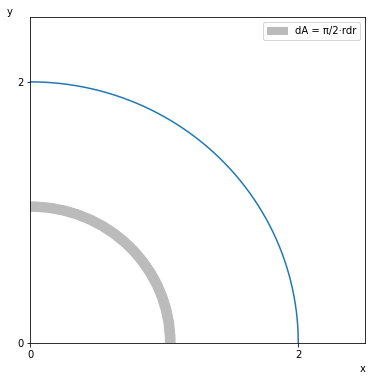

In [22]:
figure, ax = plt.subplots(figsize=(6, 6))

# plot de l'arc de cercle principal
x = np.linspace(0, 2, 1000)
y = np.sqrt(4 - x**2)
plt.plot(x, y)


# Plot des deux arcs de cercle représentant dr ( en réalité 2 cercles superposés de rayon 1+dr (gris) et 1 (blanc))
dr = 0.08
inner_arc = patches.Circle((0,0), radius=1, color='white')
outer_arc = patches.Circle((0,0), radius=1+dr, color='#BBB', label='dA = π/2·rdr')
ax.add_patch(outer_arc)
ax.add_patch(inner_arc)


# paramétrage du plot
## taille des bornes
plt.xlim(0,2.5)
plt.ylim(0, 2.5)
## labels des axes
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top', rotation=0)
## réduction du nombre de ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

# légende
plt.legend()
## lets's go
plt.show()

### Écrire un autre script, en vous inspirant du premier, pour calculer cette intégrale.

In [23]:
A = 0  # initialisation de l'aire à 0
dr = 1e-1  # pas d'intégration
r = 0  # initialisation de r à la première borne
while r < 2:  # tant que r est inférieur à la borne de fin, on répète le bloc indenté
    A += (np.pi / 2) * r * dr  # On incrémente l'aire de π/2·rdr
    r += dr  # on incrémente r du pas d'intégration
print('Résultat par la méthode de Riemann: {0:f}'.format(A))
print('Résultat par la méthode de Riemann: {0:f}'.format(np.pi))

Résultat par la méthode de Riemann: 2.984513
Résultat par la méthode de Riemann: 3.141593


## Extension au cas des intégrales multiples

Reprendre l'exemple précédent du calcul de l'aire d'un quart de disque mais écrire cette fois le
calcul de l'aire sous la forme d'une intégrale double, en cartésien et en polaire. Puis écrire les
scripts correspondant. Indication : il faut écrire deux boucles imbriquées en faisant attention à
l'initialisation des variables.

### Surface calculée par une intégrale double en coordonnées cartésiennes (à rédiger)

### Surface calculée par une intégrale double en coordonnées polaires

![img](quart_disque_intregration_double.png)

$S = \displaystyle\frac{\pi}{4} \approx 0,785398163$ 

$\mathrm{d}S = r \mathrm{d}r \mathrm{d}\theta$ en coordonnées polaires.

$S = \displaystyle\int_{0}^{1}\int_{0}^{\frac{\pi}{2}} {\mathrm{d}\theta r \mathrm{d}r } = \int_{0}^{\frac{\pi}{2}}\displaystyle\int_{0}^{1} {r \mathrm{d}r \mathrm{d}\theta} = \int_{0}^{\frac{\pi}{2}} {\mathrm{d}\theta} \displaystyle\int_{0}^{1} {r \mathrm{d}r }$.

Peut-on inverser l'ordre d'intégration ? Oui car les variables sont séparées

Peut-on séparer l'intégrale double en un produit de deux intégrales simples ? Oui pour la même raison.

Résolution : $S =\displaystyle\frac{\pi}{2} \int_{0}^{1} {r \mathrm{d}r} = \displaystyle\frac{\pi}{4} \left[ r^{2} \right]_{0}^{1} = \displaystyle\frac{\pi}{4}$


In [24]:
# script Python double intégrale avec 2 boucles imbriquées
from math import pi, sin, cos
S1 = 0
S2 = 0
dr = 1e-3
dt = 1e-3

# Premier calcul par le produit des deux intégrales
r = 0
while r < 1:
    S1 += r*dr # mise à jour de S1
    r += dr # incrémentation de r par le pas

t = 0
while t < pi/2:
    S2 += dt # mise à jour de S2
    t += dt # mise à jour de t
    
# Second calcul par boucles imbriquées

S = 0
r = 0

while r < 1:
    t = 0 # initialisation de t à la première borne
    while t < pi/2:
        S += r*dr*dt # mise à jour de S
        t += dt # on incrémente t de la valeur du pas
    r += dr # incrémentation de r par la valeur de son pas
    
print('Résultat par le produit des deux intégrales : {0:f}'.format(S1*S2))
print('Résultat intégrale double : {0:f}'.format(S))
print('Résultat par le calcul analytique π/4 : {0:f}'.format(pi/4))

      

Résultat par le produit des deux intégrales : 0.784714
Résultat intégrale double : 0.784714
Résultat par le calcul analytique π/4 : 0.785398


Influence des pas d'intégration : comme prévisible, plus les pas sont petits et meilleure est
la convergence vers la solution exacte. Mais attention au temps de calcul ! Avec 1E − 5 ça
prend déjà plusieurs secondes pour les deux boucles imbriquées.

## Intégrale double quelconque à variables liées en coordonnées cartésiennes

Dans le plan $\mathbb{R}^{2}$ muni d'un repère orthonormé, on considère le domaine $D$ défini par

 $D = \left\{ (x, y) \in \mathbb{R}^{2} / -2 \leq y \leq 2, \displaystyle\frac{1}{2}y - 1 \leq x \leq y^{2}\right\}$



### Dessiner ce domaine et calculer son aire. Peut-on inverser l'ordre d'intégration ? Peut-on séparer l'intégrale double en un produit de deux intégrales simples ?

\begin{equation*}
\begin{split}
S & = \displaystyle\int_{-2}^{2}\int_{\frac{1}{2}y-1}^{y^{2}} {\mathrm{d}x \mathrm{d}y}\\
& = \displaystyle\int_{-2}^{2} \left( y^{2} - \frac{1}{2}y + 1 \right)\mathrm{d}y\\
& = \displaystyle \bigg[ \displaystyle\frac{y^{3}}{3} - \frac{y^{2}}{4} + y \bigg]_{-2}^{2} = \frac{28}{3}\\
\end{split}
\end{equation*}

Oui on peut inverser l'ordre d'intégration mais c'est plus dur car il faut couper l'intégrale en plusieurs parties :

$S = \displaystyle\int_{-2}^{0}\int_{-2}^{2x+2} {\mathrm{d}y \mathrm{d}x} + \displaystyle\int_{0}^{4}\int_{-2}^{-\sqrt{x}} {\mathrm{d}y \mathrm{d}x} + \displaystyle\int_{0}^{4}\int_{\sqrt{x}}^{2} {\mathrm{d}y \mathrm{d}x}$


Et on ne peut pas séparer l'intégrale en un produit de deux intégrales simples car les variables
sont liées.

![](fig_exercice_32.jpg)

### Écrire un script Python permettant d'approximer $S$.

In [25]:
S = 0 # initialisation du résultat
dx = 1e-3 # on ne peut pas prendre plus petit, le temps de calcul exploserait
dy = 1e-3

y = -2 # initialisation de y à sa première borne

while y < 2:
    x = 0.5*y-1 # initialisation de x à sa première borne
    while x < y**2: # tant que x est inférieur à y² on répète le bloc indenté suivant
        S += dx*dy # mise à jour de S
        x += dx # mise à jour de x, incrémenté par son pas
    y += dy # mise à jour de y, incrémenté de son pas
    
print('Résultat par intégrale double : {0:f}'.format(S))
print('Résultat par calcul analytique (28/3) : {0:f}'.format(28/3))

Résultat par intégrale double : 9.340319
Résultat par calcul analytique (28/3) : 9.333333


### Soit $f:D \rightarrow \mathbb{R}$ définie par $f(x,y) = x+y$. Soit l'intégrale $I = \displaystyle\iint_{D} {f(x,y) \mathrm{d}x\mathrm{d}y}$.

Calculer $I$.

\begin{equation*}
\begin{split}
I & = \displaystyle\int_{-2}^{2}\int_{\frac{1}{2}y-1}^{y^{2}} {(x+y) \mathrm{d}x\mathrm{d}y}\\
& = \displaystyle\int_{-2}^{2} \bigg[ \displaystyle\frac{x^{2}}{2} +yx \bigg]_{\frac{1}{2}y-1}^{y^{2}}\mathrm{d}y\\
& = \displaystyle\int_{-2}^{2} \left( \displaystyle\frac{y^{4}}{2} + y^{3} -  \frac{1}{2} \left( \frac{1}{2}y-1 \right)^{2}- \frac{1}{2}y^{2}+y \right) \mathrm{d}y\\
& = \displaystyle\int_{-2}^{2} \left( \displaystyle\frac{y^{4}}{2} + y^{3} - \frac{5}{8}y^{2} + \frac{1}{2}y -  \frac{1}{2} \right) \mathrm{d}y\\
& = \displaystyle \bigg[ \displaystyle\frac{y^{5}}{10} + \frac{y^{4}}{4} - \frac{5}{24}y^{3} + \frac{1}{4}y^{2} -  \frac{1}{2}y \bigg]_{-2}^{2} = \frac{16}{15} \approx 1,066666667\\
\end{split}
\end{equation*}

### Retrouver ce résultat à l'aide d'un script *Python*

In [26]:
I = 0 # initialisation du résultat
dx = 1e-3 # on ne peut pas prendre plus petit, le temps de calcul exploserait
dy = 1e-3

y = -2 # initialisation de y à sa première borne

while y < 2:
    x = 0.5*y-1 # initialisation de x à sa première borne
    while x < y**2: # tant que x est inférieur à y² on répète le bloc indenté suivant
        I += (x+y)*dx*dy # mise à jour de I
        x += dx # mise à jour de x, incrémenté par son pas
    y += dy # mise à jour de y, incrémenté de son pas
    
print('Résultat par intégrale double : {0:f}'.format(I))
print('Résultat par calcul analytique (16/15) : {0:f}'.format(16/15))

Résultat par intégrale double : 1.069626
Résultat par calcul analytique (16/15) : 1.066667
